In [2]:
# Import libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. Check if dataset exists locally
dataset_path = './Dataset'
if os.path.exists(dataset_path):
    print(f"Dataset found at: {dataset_path}")
    print(f"Classes found: {os.listdir(dataset_path)}")
else:
    print("Dataset not found! Please ensure the Dataset folder is in the current directory.")

Saving Dataset.zip to Dataset.zip


In [3]:
# 2. Data Preparation
train_dir = './Dataset'  # Local dataset path
img_size = (64, 64)
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [4]:
# 3. Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 4. Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

 #Display  Accuracy
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - accuracy: 0.3745 - loss: 1.9899 - val_accuracy: 0.3333 - val_loss: 1.2082
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step - accuracy: 0.4217 - loss: 1.1521 - val_accuracy: 0.3667 - val_loss: 1.0524
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.4269 - loss: 1.0165 - val_accuracy: 0.5333 - val_loss: 0.8944
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.5495 - loss: 0.8682 - val_accuracy: 0.6333 - val_loss: 0.7965
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step - accuracy: 0.7836 - loss: 0.7059 - val_accuracy: 0.8000 - val_loss: 0.5715
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.8848 - loss: 0.4766 - val_accuracy: 0.7667 - val_loss: 0.4913
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.8842 - loss: 0.3568 - val_accuracy: 0.9000 - val_loss: 0.3397
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step - accuracy: 0.9272 - loss: 0.2683 - val_accuracy: 0.8000 - val_loss:

In [ ]:
# 6. Save the trained model
model.save('flower_classifier_model.h5')
print("Model saved as 'flower_classifier_model.h5'")

# Get class names for later use
class_names = list(train_generator.class_indices.keys())
print(f"Classes found: {class_names}")

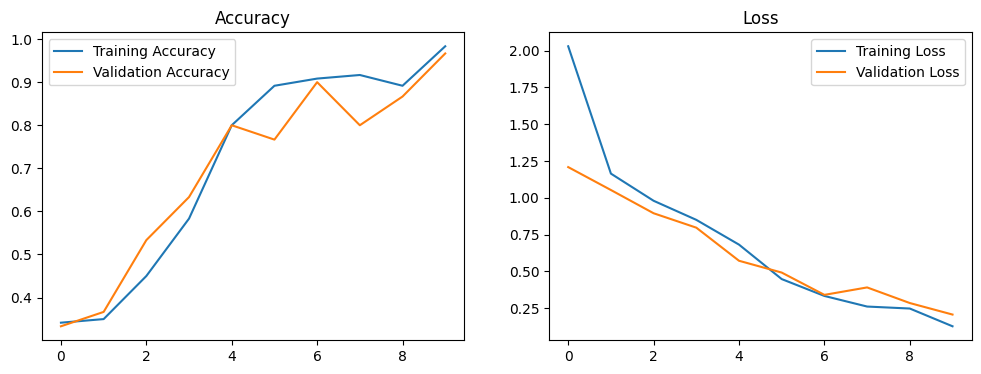

In [6]:
# 5. Plot Training and Validation Metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

Saving Test 03.jpg to Test 03.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


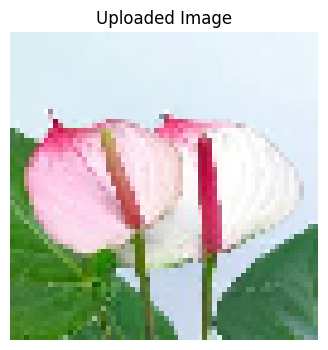

Predicted flower: Anthurm


In [13]:
# 7. Test Model with a sample image from the dataset
# Test with a sample image from the dataset
sample_dir = os.path.join(train_dir, class_names[0])  # Take first class
sample_images = os.listdir(sample_dir)

if sample_images:
    sample_img_path = os.path.join(sample_dir, sample_images[0])
    
    # Load and preprocess the image
    img = image.load_img(sample_img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    
    # Display image with predicted class
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Sample Image\\nPredicted: {predicted_class} ({confidence:.1f}% confidence)')
    plt.show()
    print(f"Predicted flower: {predicted_class} with {confidence:.1f}% confidence")
else:
    print("No sample images found in the dataset.")